In [11]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import cv2

In [12]:
#dataset creation for the covid positive cases

file_path =  "covid/metadata.csv"
image_path = "covid/images"


In [13]:
data = pd.read_csv(file_path)
print(data.shape)

(950, 30)


In [14]:
data.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [15]:
data["finding"].value_counts()

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
No Finding                                  22
Pneumonia/Bacterial/Streptococcus           22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Herpes                       3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [16]:
data["survival"].value_counts()

Y    285
N     76
Name: survival, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

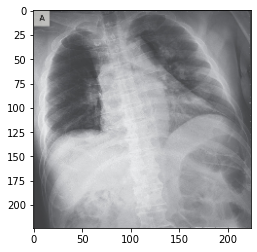

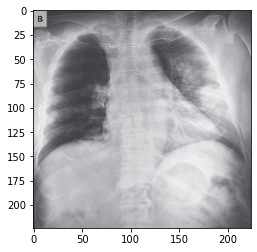

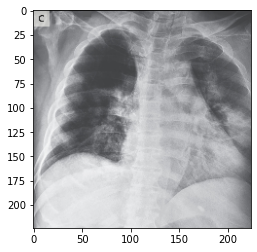

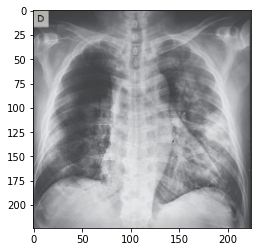

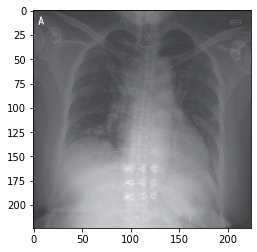

196


In [18]:
# counting and moving the images that are covid +ve and have the front view of the x-ray
# to our dataset/covid..
count=0
sample=0
for (i,row) in data.iterrows():
    if row["finding"]=="Pneumonia/Viral/COVID-19" and row["view"]=="PA":
        count+=1
        sample+=1
        IMG_PATH = os.path.join(image_path,row["filename"])
        if(sample<6):
            im = cv2.imread(IMG_PATH)
            im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
            plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
            plt.show()
        target_path = os.path.join("dataset/covid",row["filename"])
        shutil.copy2(IMG_PATH,target_path)
print(count)

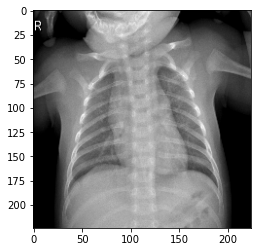

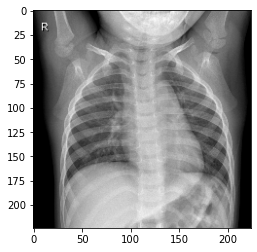

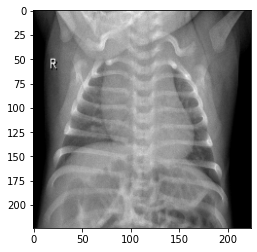

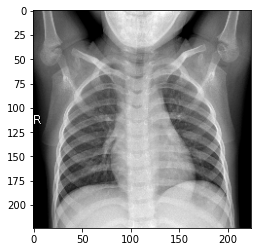

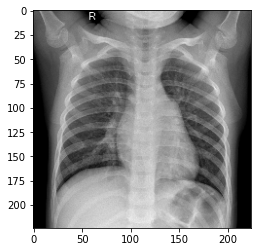

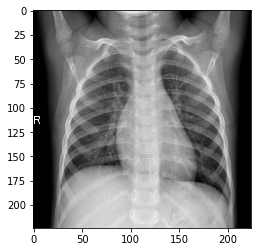

In [19]:
# for creating the normal dataset we can just manually copy paste the images
# since it is categorised by the kaggle or we can pick random images using code.

import random

image_names = os.listdir("chest_xray/train/NORMAL")

random.shuffle(image_names)

for i in range(196):
    name = image_names[i]
    path = os.path.join("chest_xray/train/NORMAL",name)
    if(i<6):
        im = cv2.imread(path)
        im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
        plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        plt.show()
    target = os.path.join("dataset/normal",name)
    shutil.copy2(path,target)
